# Prédiction sur le nombre de pokémons légendaires

## Import du dataset et des paquets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'pokemon_alopez247.csv', index_col=0).drop('Name', 1)
df

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,Grass,Poison,318,45,49,49,65,65,45,1,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Grass,Poison,405,60,62,63,80,80,60,1,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
3,Grass,Poison,525,80,82,83,100,100,80,1,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
4,Fire,NaN,309,39,52,43,60,50,65,1,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Fire,NaN,405,58,64,58,80,65,80,1,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Dark,Flying,680,126,131,95,131,98,99,6,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
718,Dragon,Ground,600,108,100,121,81,95,95,6,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
719,Rock,Fairy,600,50,100,150,100,150,50,6,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms


On vérifie les colonnes avec des données manquantes dans le but de les supprimer.

In [3]:
df.isna().sum()

Type_1                0
Type_2              371
Total                 0
HP                    0
Attack                0
Defense               0
Sp_Atk                0
Sp_Def                0
Speed                 0
Generation            0
isLegendary           0
Color                 0
hasGender             0
Pr_Male              77
Egg_Group_1           0
Egg_Group_2         530
hasMegaEvolution      0
Height_m              0
Weight_kg             0
Catch_Rate            0
Body_Style            0
dtype: int64

In [4]:
df = df.drop(['Type_2', 'Pr_Male', 'Egg_Group_2'], 1)

Transformation des valeurs littérales en valeurs numériques 

In [5]:
from sklearn.preprocessing import LabelEncoder

for column in list(df.describe(exclude=[np.number]).columns):
    le = LabelEncoder()
    le.fit(df[column])
    df[column + '_']=le.transform(df[column])
df

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,...,Weight_kg,Catch_Rate,Body_Style,Type_1_,isLegendary_,Color_,hasGender_,Egg_Group_1_,hasMegaEvolution_,Body_Style_
Number,,,,,,,,,,,,,,,,,,,,,
1,Grass,318,45,49,49,65,65,45,1,False,...,6.9,45,quadruped,9,0,3,1,10,0,9
2,Grass,405,60,62,63,80,80,60,1,False,...,13.0,45,quadruped,9,0,3,1,10,0,9
3,Grass,525,80,82,83,100,100,80,1,False,...,100.0,45,quadruped,9,0,3,1,10,1,9
4,Fire,309,39,52,43,60,50,65,1,False,...,8.5,45,bipedal_tailed,6,0,7,1,10,0,0
5,Fire,405,58,64,58,80,65,80,1,False,...,19.0,45,bipedal_tailed,6,0,7,1,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Dark,680,126,131,95,131,98,99,6,True,...,203.0,45,two_wings,1,1,7,0,11,0,12
718,Dragon,600,108,100,121,81,95,95,6,True,...,305.0,3,serpentine_body,2,1,3,0,11,0,10
719,Rock,600,50,100,150,100,150,50,6,True,...,8.8,3,head_arms,15,1,5,0,11,1,3


Extraction de 4 colonnes pour construire un nouveau dataset 

In [6]:
columns = ['Total','Height_m','Weight_kg','isLegendary_']
new_df = df.loc[:,columns]
new_df

,Total,Height_m,Weight_kg,isLegendary_
Number,,,,
1,318,0.71,6.9,0
2,405,0.99,13.0,0
3,525,2.01,100.0,0
4,309,0.61,8.5,0
5,405,1.09,19.0,0
...,...,...,...,...
717,680,5.79,203.0,1
718,600,5.00,305.0,1
719,600,0.71,8.8,1


Mise à l'échelle des colonnes du nouveau jeu de données

<AxesSubplot:>

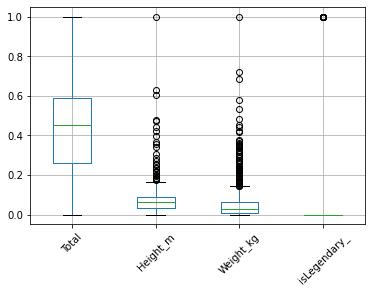

In [7]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
df_minmax = min_max.fit_transform(new_df)

pd.DataFrame(df_minmax, columns=new_df.columns, index=new_df.index).boxplot(rot = 45)

In [8]:
df_scale = scale(new_df)
# df_scale
pd.DataFrame(df_scale, columns = new_df.columns, index=new_df.index).describe()

,Total,Height_m,Weight_kg,isLegendary_
count,7.210000e+02,7.210000e+02,7.210000e+02,7.210000e+02
mean,3.202863e-17,-6.667497e-17,-1.909399e-16,8.130343e-17
std,1.000694e+00,1.000694e+00,1.000694e+00,1.000694e+00
min,-2.171285e+00,-1.001279e+00,-6.365373e-01,-2.610520e-01
25%,-8.937682e-01,-5.126070e-01,-5.320826e-01,-2.610520e-01
50%,5.524431e-02,-1.484981e-01,-3.231733e-01,-2.610520e-01
75%,7.396283e-01,2.443561e-01,4.747216e-02,-2.610520e-01
max,2.756280e+00,1.279653e+01,1.003244e+01,3.830654e+00


Statistique multi-variée

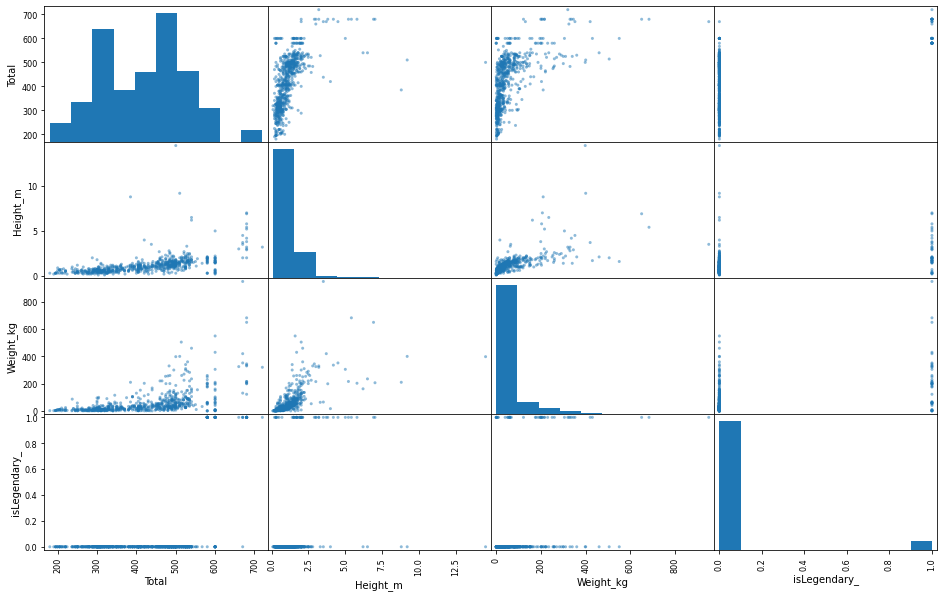

In [9]:
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(new_df, figsize = (16,10))

Taux de pokémons Légendaires par génération

In [10]:
(df.groupby('Generation').isLegendary.value_counts(normalize=True).unstack()* 100).round(decimals=2)

isLegendary,False,True
Generation,,
1,97.35,2.65
2,95.00,5.00
3,92.59,7.41
4,89.72,10.28
5,93.59,6.41
6,91.67,8.33


Colonne "isLegendary" déplacée à la fin du dataset pour une meilleure lecture sur le heat map de correlation

In [11]:
df['isLegendary'] = df.pop('isLegendary')
df

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Color,...,Catch_Rate,Body_Style,Type_1_,isLegendary_,Color_,hasGender_,Egg_Group_1_,hasMegaEvolution_,Body_Style_,isLegendary
Number,,,,,,,,,,,,,,,,,,,,,
1,Grass,318,45,49,49,65,65,45,1,Green,...,45,quadruped,9,0,3,1,10,0,9,False
2,Grass,405,60,62,63,80,80,60,1,Green,...,45,quadruped,9,0,3,1,10,0,9,False
3,Grass,525,80,82,83,100,100,80,1,Green,...,45,quadruped,9,0,3,1,10,1,9,False
4,Fire,309,39,52,43,60,50,65,1,Red,...,45,bipedal_tailed,6,0,7,1,10,0,0,False
5,Fire,405,58,64,58,80,65,80,1,Red,...,45,bipedal_tailed,6,0,7,1,10,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Dark,680,126,131,95,131,98,99,6,Red,...,45,two_wings,1,1,7,0,11,0,12,True
718,Dragon,600,108,100,121,81,95,95,6,Green,...,3,serpentine_body,2,1,3,0,11,0,10,True
719,Rock,600,50,100,150,100,150,50,6,Pink,...,3,head_arms,15,1,5,0,11,1,3,True


In [12]:
corr = df.corr()
corr

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasGender,hasMegaEvolution,...,Weight_kg,Catch_Rate,Type_1_,isLegendary_,Color_,hasGender_,Egg_Group_1_,hasMegaEvolution_,Body_Style_,isLegendary
Total,1.000000,0.642628,0.704164,0.605831,0.723737,0.706501,0.548890,0.092868,-0.385978,0.228503,...,0.535966,-0.738280,0.040608,0.481837,0.023801,-0.385978,0.169128,0.228503,-0.061686,0.481837
HP,0.642628,1.000000,0.431680,0.228834,0.368640,0.376006,0.170031,0.071545,-0.155031,0.093708,...,0.431320,-0.478725,0.102443,0.258926,-0.048183,-0.155031,0.100769,0.093708,-0.039259,0.258926
Attack,0.704164,0.431680,1.000000,0.433233,0.335205,0.207211,0.335013,0.093857,-0.196892,0.203840,...,0.469395,-0.525106,-0.036951,0.302786,-0.053321,-0.196892,0.122924,0.203840,-0.094506,0.302786
Defense,0.605831,0.228834,0.433233,1.000000,0.202519,0.483986,-0.008663,0.068409,-0.269466,0.122666,...,0.476983,-0.436558,0.126830,0.274446,-0.049101,-0.269466,0.168626,0.122666,-0.002572,0.274446
Sp_Atk,0.723737,0.368640,0.335205,0.202519,1.000000,0.492861,0.443106,0.069689,-0.336579,0.175581,...,0.285048,-0.539114,0.007209,0.409739,0.072825,-0.336579,0.124430,0.175581,-0.064462,0.409739
Sp_Def,0.706501,0.376006,0.207211,0.483986,0.492861,1.000000,0.233487,0.055421,-0.337265,0.149796,...,0.328645,-0.513014,0.033148,0.360215,0.070129,-0.337265,0.113026,0.149796,-0.075464,0.360215
Speed,0.548890,0.170031,0.335013,-0.008663,0.443106,0.233487,1.000000,0.003920,-0.216964,0.147844,...,0.108637,-0.410557,-0.071210,0.286082,0.104422,-0.216964,0.029470,0.147844,0.035160,0.286082
Generation,0.092868,0.071545,0.093857,0.068409,0.069689,0.055421,0.003920,1.000000,-0.029916,-0.125374,...,0.034003,-0.025227,-0.105753,0.071875,-0.029648,-0.029916,-0.097631,-0.125374,-0.013733,0.071875
hasGender,-0.385978,-0.155031,-0.196892,-0.269466,-0.336579,-0.337265,-0.216964,-0.029916,1.000000,0.016769,...,-0.361465,0.272304,-0.074336,-0.644714,-0.025473,1.000000,-0.280928,0.016769,-0.001313,-0.644714
hasMegaEvolution,0.228503,0.093708,0.203840,0.122666,0.175581,0.149796,0.147844,-0.125374,0.016769,1.000000,...,0.129057,-0.173273,-0.040115,0.047955,-0.010276,0.016769,-0.008937,1.000000,-0.071584,0.047955


<AxesSubplot:>

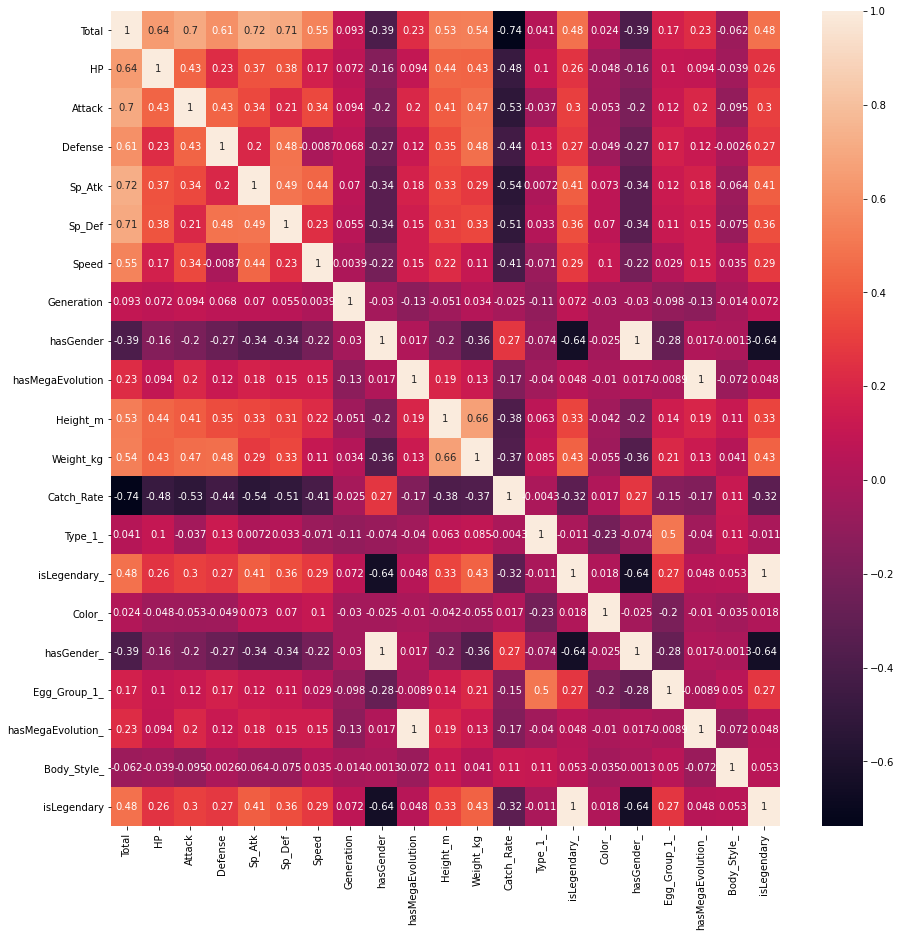

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax)

On supprime les colonnes avec une corrélation quasi-nulle

In [14]:
df = df.drop(['Generation', 'hasMegaEvolution', 'Type_1', 'Type_1_', 'Color', 'Color_', 'Body_Style', 'Body_Style_'], 1)

<AxesSubplot:>

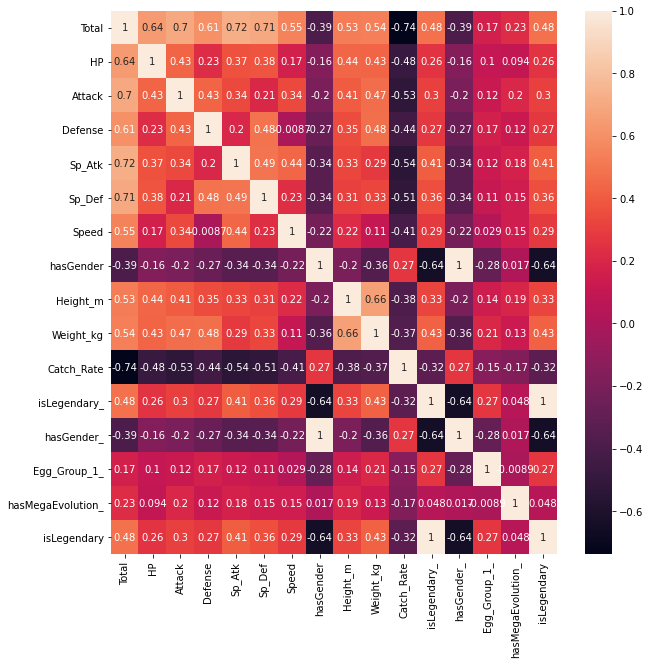

In [15]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, ax=ax)

Taux de pokémons légendaires dans le jeu de données (référence) 

In [16]:
df.isLegendary.value_counts(normalize=True) * 100

False    93.619972
True      6.380028
Name: isLegendary, dtype: float64

Prédiction du taux de pokémons légendaires

In [17]:
X = new_df.drop('isLegendary_', 1)
y = new_df['isLegendary_']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
y_test

Number
409    0
590    0
471    0
214    0
55     0
      ..
39     0
189    0
208    0
333    0
328    0
Name: isLegendary_, Length: 181, dtype: int64

In [19]:
y_train.value_counts(normalize=True) * 100

0    93.518519
1     6.481481
Name: isLegendary_, dtype: float64

Prédiction avec stratification

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [21]:
y_train.value_counts(normalize=True) * 100

0    93.703704
1     6.296296
Name: isLegendary_, dtype: float64

In [22]:
y_train.value_counts()

0    506
1     34
Name: isLegendary_, dtype: int64

## Création d'un arbre de décision

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree

DecisionTreeClassifier(random_state=42)

In [24]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
y_pred = tree.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)

Calcul de la précision

In [26]:
from sklearn.metrics import confusion_matrix
mat_conf = confusion_matrix(y_test, y_pred)
acc = mat_conf.diagonal().sum()/mat_conf.sum() * 100
acc

96.13259668508287

In [27]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
score = tree.score(X_test, y_test)
acc * 100, score * 100

(96.13259668508287, 96.13259668508287)

Visualisation de l'arbre

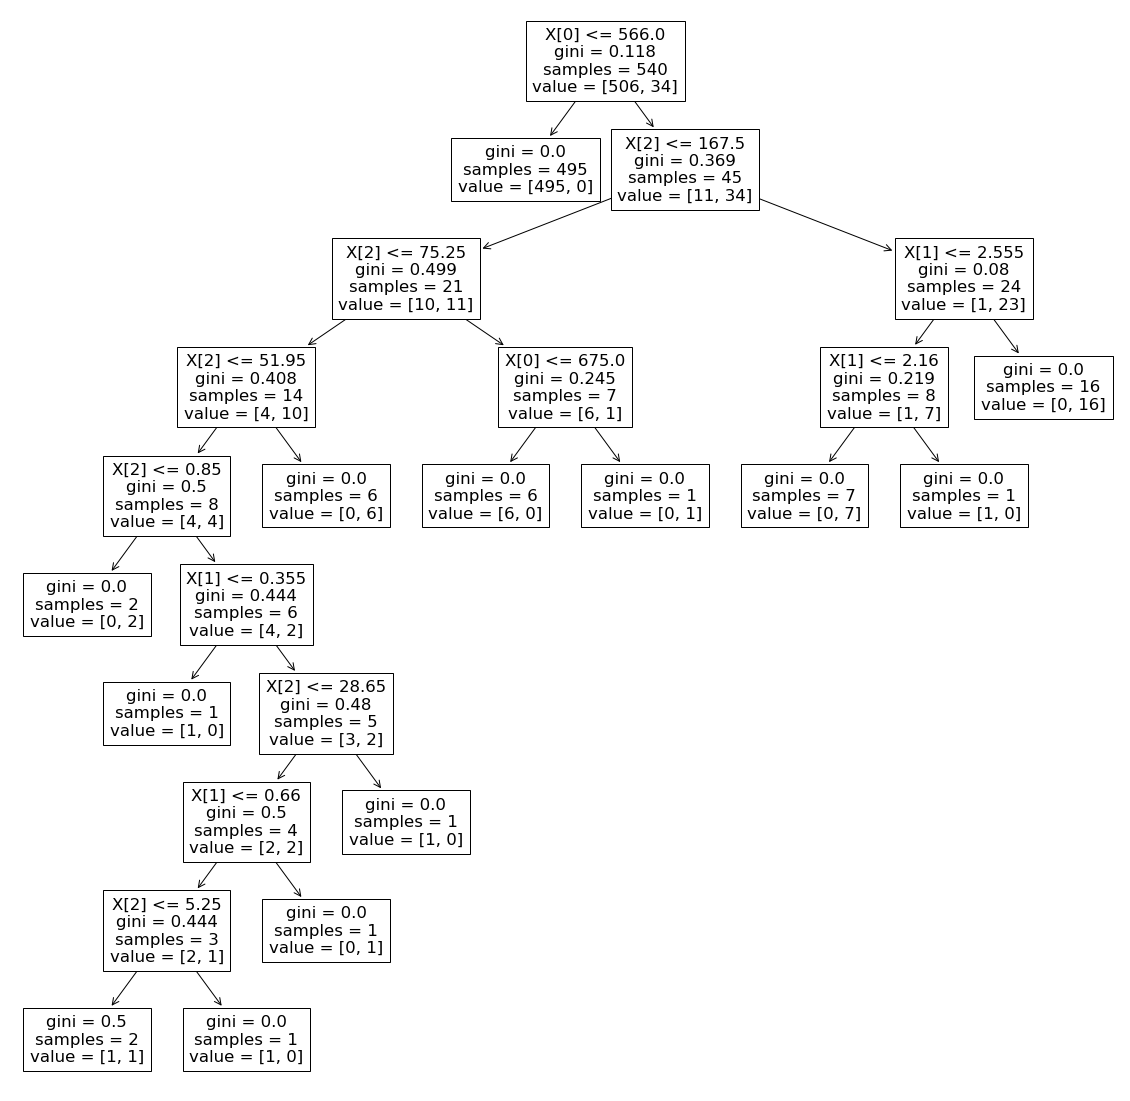

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
tree_df = plot_tree(tree)

Optimisation des paramètres de l'arbre de décision

In [29]:
from sklearn.model_selection import GridSearchCV
param = [{"max_depth" : list(range(2, 10))}]
grid =  GridSearchCV(DecisionTreeClassifier(), param, cv = 10, n_jobs = -1)
grid = grid.fit(X_train, y_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - grid.best_score_, grid.best_params_))

Meilleur score = 0.014815, Meilleur paramètre = {'max_depth': 3}


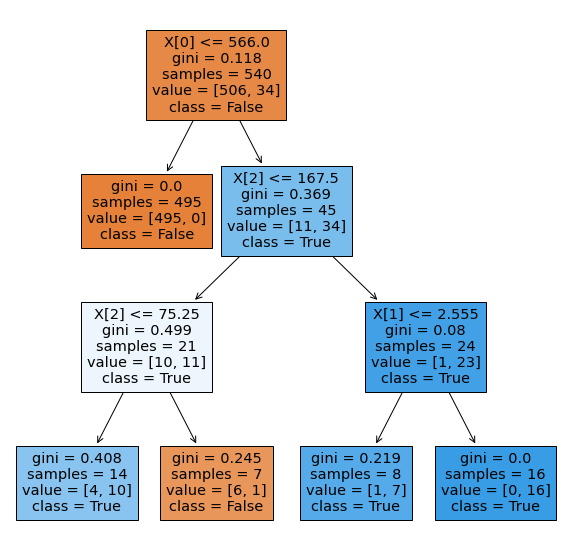

In [30]:
tree = DecisionTreeClassifier(random_state=42,max_depth=3)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
plt.figure(figsize = (10, 10))
tree_df = plot_tree(tree,filled=True,class_names=['False', 'True'])

In [31]:
from sklearn.tree import export_text
tree_rules = export_text(tree, feature_names=X_train.columns.values.tolist())
print(tree_rules)

|--- Total <= 566.00
|   |--- class: 0
|--- Total >  566.00
|   |--- Weight_kg <= 167.50
|   |   |--- Weight_kg <= 75.25
|   |   |   |--- class: 1
|   |   |--- Weight_kg >  75.25
|   |   |   |--- class: 0
|   |--- Weight_kg >  167.50
|   |   |--- Height_m <= 2.56
|   |   |   |--- class: 1
|   |   |--- Height_m >  2.56
|   |   |   |--- class: 1

